In [1]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=494619234d44d6aa8b7441b900bdba37660cf10d11d3171507c48c69d75d6b31
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


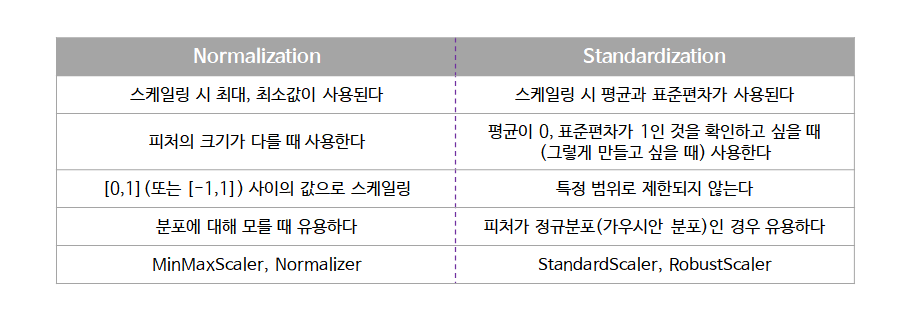

In [10]:
from sklearn.preprocessing import MinMaxScaler

train = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
test = [[10, 20], [100, 200]]
scaler = MinMaxScaler()
# print(scaler.fit(data))
# print(scaler.data_min_)
# print(scaler.data_max_)
# print('-' * 50)
# print(scaler.transform(data))
print(scaler.fit_transform(data))
print('-' * 50)
# 주의! 테스트 데이터를 피팅하고 트랜스폼 하면 안됨
# 빈드시 트레인 데이터의 피팅을 그대로 테스트에 적용해야댐
print(scaler.transform(test))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
--------------------------------------------------
[[ 5.5    1.125]
 [50.5   12.375]]


In [22]:
import pandas as pd
from IPython.display import display

df = pd.DataFrame({
    '지역': ['서울', '서울', '부산', '제주', '제주'],
    '호감도': [1, 2, 3, 4, 4],
    '성별': ['여', '여', '남', '남', '여']
})

# pd.get_dummies
# Convert categorical variable into dummy/indicator variables.
# 가중치에 영향을 줘선 안되는 변수를 더미 변수화
display(pd.get_dummies(df))

a = df[['호감도', '성별']]
b = pd.get_dummies(df['지역'])
df1 = pd.concat([a, b], axis=1)
df1

,호감도,지역_부산,지역_서울,지역_제주,성별_남,성별_여
0,1,0,1,0,0,1
1,2,0,1,0,0,1
2,3,1,0,0,1,0
3,4,0,0,1,1,0
4,4,0,0,1,0,1


,호감도,성별,부산,서울,제주
0,1,여,0,1,0
1,2,여,0,1,0
2,3,남,1,0,0
3,4,남,0,0,1
4,4,여,0,0,1


In [26]:
# 더미변수가 많이 생성되는 문자 피처가 많은 data는 
# 라벨인코더까지만하고(더미변수화 안함 ) 라쏘 모델을 사용함
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df1['성별'])
display(encoder.classes_)
labels = encoder.transform(df1['성별'])
df1['성별'] = labels
df1

array(['남', '여'], dtype=object)

,호감도,성별,부산,서울,제주
0,1,1,0,1,0
1,2,1,0,1,0
2,3,0,1,0,0
3,4,0,0,0,1
4,4,1,0,0,1
